In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
train = pd.read_csv("../data/cleaned_train.csv")
test = pd.read_csv("../data/cleaned_test.csv")

In [3]:
train.head(5)

,id,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,perc_unemployed,after_retirement,interest_of_income,bad_practice
0,0,37,35000,0.0,2,6000,11.49,0.171429,0,14,...,0,1,0,0,0,0,1.000000,0,1.969714,1
1,1,22,56000,6.0,3,4000,13.35,0.071429,0,2,...,0,0,0,1,0,0,0.727273,0,0.953571,0
2,2,29,28800,8.0,1,6000,8.90,0.208333,0,10,...,0,0,0,0,1,0,0.724138,0,1.854167,1
3,3,30,70000,14.0,2,12000,11.11,0.171429,0,5,...,0,0,0,0,0,1,0.533333,0,1.904571,0
4,4,22,60000,2.0,1,6000,6.92,0.100000,0,3,...,0,0,0,1,0,0,0.909091,0,0.692000,0


In [4]:
test.head(5)


,id,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,perc_unemployed,after_retirement,interest_of_income,bad_practice
0,58645,23,69000,3.0,6,25000,15.76,0.36,0,2,...,0,0,1,0,0,0,0.869565,0,5.710145,1
1,58646,26,96000,6.0,3,10000,12.68,0.10,1,4,...,0,0,0,0,1,0,0.769231,0,1.320833,0
2,58647,26,30000,5.0,5,4000,17.19,0.13,1,2,...,0,0,0,0,0,1,0.807692,0,2.292000,0
3,58648,33,50000,4.0,1,7000,8.90,0.14,0,7,...,1,0,0,0,0,0,0.878788,0,1.246000,0
4,58649,26,102000,8.0,4,15000,16.32,0.15,1,4,...,0,0,1,0,0,0,0.692308,0,2.400000,0


In [5]:
train.describe()

,id,person_age,person_income,person_emp_length,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,perc_unemployed,after_retirement,interest_of_income,bad_practice
count,58594.000000,58594.000000,5.859400e+04,58594.000000,58594.000000,58594.000000,58594.000000,58594.000000,58594.000000,58594.000000,...,58594.000000,58594.000000,58594.000000,58594.000000,58594.000000,58594.000000,58594.000000,58594.000000,58594.000000,58594.000000
mean,29319.161075,27.548230,6.404407e+04,4.686777,2.066611,9215.826740,10.677721,0.159758,0.148360,5.813428,...,0.155733,0.209305,0.107144,0.186401,0.170785,0.170632,0.827128,0.000597,1.750086,0.305833
std,16929.444426,6.020216,3.793611e+04,3.879072,1.046094,5562.215785,3.034334,0.094258,0.355459,4.029063,...,0.362605,0.406816,0.309299,0.389434,0.376325,0.376190,0.133792,0.024433,1.266393,0.460763
min,0.000000,20.000000,4.200000e+03,0.000000,1.000000,500.000000,5.420000,0.000789,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.293103,0.000000,0.012332,0.000000
25%,14654.250000,23.000000,4.200000e+04,2.000000,1.000000,5000.000000,7.880000,0.089286,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.727273,0.000000,0.837500,0.000000
50%,29318.500000,26.000000,5.800000e+04,4.000000,2.000000,8000.000000,10.750000,0.142222,0.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.857143,0.000000,1.428143,0.000000
75%,43977.750000,30.000000,7.560000e+04,7.000000,3.000000,12000.000000,12.990000,0.209302,0.000000,8.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.935484,0.000000,2.348269,1.000000
max,58644.000000,84.000000,1.900000e+06,41.000000,7.000000,35000.000000,23.220000,3.125000,1.000000,30.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.729167,1.000000


area under the ROC curve will be used for evaluation

In [6]:
def train_random_forrest(X_train, y_train, val_X, val_y):
    # Split features and target
    # Define the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize numeric features
        ('classifier', RandomForestClassifier(random_state=42))  # Model
    ])

    # Define hyperparameters to tune
    param_grid = {
        'classifier__n_estimators': range(50, 100, 40),  # Number of trees
        'classifier__max_depth': [None, 10, 20],  # Maximum depth of trees
        'classifier__min_samples_split': [2, 5, 10]  # Minimum samples to split
    }

    # Perform hyperparameter tuning with GridSearchCV
    grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    val_score = grid_search.best_estimator_.score(val_X, val_y)

    return grid_search.best_estimator_, val_score


In [7]:
def train_svc(X_train, y_train, val_X, val_y):
    """
    Trains an SVM (SVC) model with hyperparameter tuning.
    """
    # Define the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize numeric features
        ('classifier', SVC())
    ])

    # Define hyperparameters for tuning
    param_grid = {
        'classifier__C': np.arange(0.1, 7, 0.5),
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto']
    }

    # Perform hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Evaluate on val_X, val_y
    val_score = grid_search.best_estimator_.score(val_X, val_y)

    return grid_search.best_estimator_, val_score

In [8]:

def train_knn(X_train, y_train, val_X, val_y):
    """
    Trains a KNN classifier with hyperparameter tuning.
    """
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('classifier', KNeighborsClassifier())
    ])

    param_grid = {
        'classifier__n_neighbors': [3, 5, 7, 9, 11, 13, 15],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__p': [1, 2]  # 1: Manhattan, 2: Euclidean
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    val_score = grid_search.best_estimator_.score(val_X, val_y)

    return grid_search.best_estimator_, val_score

In [9]:
def train_decision_tree(X_train, y_train, val_X, val_y):
    """
    Trains a Decision Tree classifier without scaling.
    """
  
    pipeline = Pipeline([
        ('classifier', DecisionTreeClassifier(random_state=42))
    ])

    param_grid = {
        'classifier__max_depth': [None, 10, 20, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    val_score = grid_search.best_estimator_.score(val_X, val_y)

    return grid_search.best_estimator_, val_score

In [10]:
def train_xgboost(X_train, y_train, val_X, val_y):
    """
    Trains an XGBoost classifier with hyperparameter tuning.
    """
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # XGBoost benefits from scaled input
        ('classifier', XGBClassifier(eval_metric='logloss'))
    ])

    param_grid = {
        'classifier__n_estimators': range(50, 500, 50),
        'classifier__max_depth': [3, 5, 7, 9, 11],
        'classifier__learning_rate': [0.1, 0.2, 0.3],
        'classifier__subsample': [0.8, 1.0]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    val_score = grid_search.best_estimator_.score(val_X, val_y)

    return grid_search.best_estimator_, val_score

In [11]:

def train_logistic_regression(X_train, y_train, val_X, val_y):
    """
    Trains a Logistic Regression model with hyperparameter tuning.
    """
    # Define the pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Standardize numeric features
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    # Define hyperparameter combinations that are valid
    param_grid = [
        {'classifier__C': np.logspace(-4, 4, 10), 'classifier__penalty': ['l1'], 'classifier__solver': ['liblinear', 'saga']},
        {'classifier__C': np.logspace(-4, 4, 10), 'classifier__penalty': ['l2'], 'classifier__solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
        {'classifier__C': np.logspace(-4, 4, 10), 'classifier__penalty': ['elasticnet'], 'classifier__solver': ['saga'], 'classifier__l1_ratio': [0.1, 0.5, 0.9]}
    ]

    # Perform hyperparameter tuning
    grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='roc_auc', n_jobs=-1, error_score='raise')
    grid_search.fit(X_train, y_train)

    # Evaluate on val_X, val_y
    val_score = grid_search.best_estimator_.score(val_X, val_y)

    return grid_search.best_estimator_, val_score

In [12]:
train_X_all = train.drop(['loan_status', 'id', 'after_retirement', 'loan_intent_PERSONAL'],axis=1)
test_predict_df = test.drop(['id', 'after_retirement', 'loan_intent_PERSONAL'],axis=1)
train_y_all = train['loan_status']

In [13]:
X_train, val_X, y_train, val_y = train_test_split(train_X_all, train_y_all, test_size=0.15, random_state=42)

In [14]:
def smote(X, y):
    smt = SMOTETomek(random_state=42)
    X_resampled, y_resampled = smt.fit_resample(X, y)

    return X_resampled, y_resampled

In [15]:
X_train, y_train = smote(X_train, y_train)

In [16]:
y_train.value_counts()

loan_status
0    41361
1    41361
Name: count, dtype: int64

In [150]:
best_model_dt, val_dt = train_decision_tree(X_train, y_train, val_X, val_y)

val_dt

0.911490329920364

In [151]:
best_model_knn, val_knn = train_knn(X_train, y_train, val_X, val_y)
val_knn

0.9085324232081912

In [152]:
best_model_rf, val_rf = train_random_forrest(X_train, y_train, val_X, val_y)
val_rf

0.9333333333333333

In [153]:
best_model_svc, val_svc = train_svc(X_train, y_train, val_X, val_y)
val_svc

KeyboardInterrupt: 

In [154]:
best_model_lr, val_lr = train_logistic_regression(X_train, y_train, val_X, val_y)
val_lr

/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  

KeyboardInterrupt: 

In [ ]:
best_model_xg, val_xg = train_xgboost(X_train, y_train, val_X, val_y)
val_xg

/Users/steffanschoonbee/Library/Python/3.9/lib/python/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


0.9395904436860069

In [ ]:
models = {
    'Decision Tree': (best_model_dt, val_dt),
    'KNN': (best_model_knn, val_knn),
    'Random Forest': (best_model_rf, val_rf),
    'SVC': (best_model_svc, val_svc),
    'XGBoost': (best_model_xg, val_xg),
    'Logistic': (best_model_lr, val_lr)
}

# Find the best model based on validation accuracy
best_model_name, (best_model, best_val_score) = max(models.items(), key=lambda x: x[1][1])


# Output results
print(f"Best Model: {best_model_name} with Validation Score: {best_val_score:.4f}")

NameError: name 'best_model_dt' is not defined

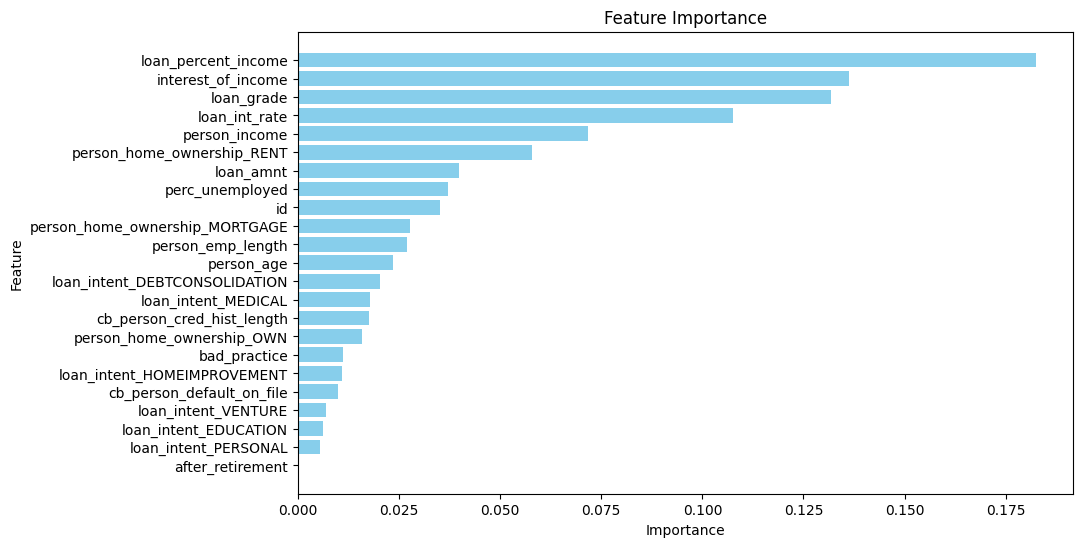

In [ ]:
best_model_rf_clf = best_model_rf.named_steps['classifier']  # Change to best_model_dt.named_steps['classifier'] for Decision Tree

# Get feature importance
feature_importance = best_model_rf_clf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': train_X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at top
plt.show()

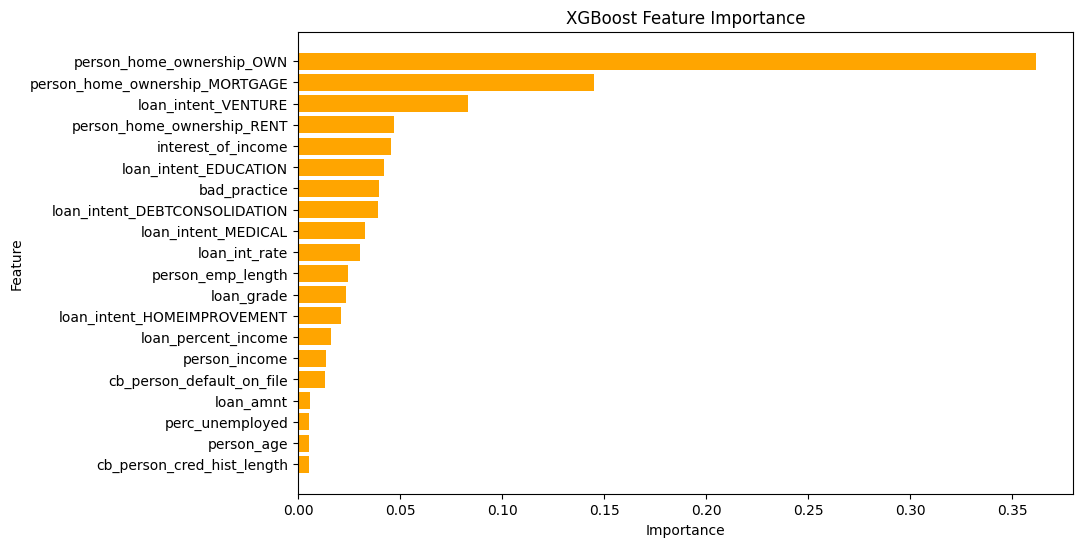

In [41]:
best_model_xg_clf = best_model_xg.named_steps['classifier']  # Extract XGBoost classifier

# Get feature importance
feature_importance = best_model_xg_clf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({'Feature': train_X.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(features_df['Feature'], features_df['Importance'], color='orange')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()

In [44]:
pred = best_model_xg.predict_proba(val_X)[:, 1]
roc_auc_score(val_y, pred)

0.9357337663833415

In [48]:
# Predict on test_X using the best model
test_predictions = best_model_xg.predict_proba(test_predict_df)[:, 1]

In [49]:
final = pd.DataFrame({'id' : test['id'] , 'loan_status' : test_predictions})

In [108]:
final

,id,loan_status
0,58645,0.998749
1,58646,0.011196
2,58647,0.876348
3,58648,0.001872
4,58649,0.059720
...,...,...
39093,97738,0.000730
39094,97739,0.000068
39095,97740,0.000575
39096,97741,0.071186


In [51]:
final.to_csv("../data/predictions.csv", index=False)

# Neural Network


In [105]:
model = keras.Sequential([
        layers.Dense(128, activation=layers.LeakyReLU(negative_slope=0.1)),  
        layers.Dropout(0.4),
        layers.Dense(64, activation=layers.LeakyReLU(negative_slope=0.1)), 
        layers.Dropout(0.4),
        layers.Dense(32, activation=layers.LeakyReLU(negative_slope=0.1)), 
        layers.Dropout(0.4),
        layers.Dense(32, activation=layers.LeakyReLU(negative_slope=0.1)), 
        layers.Dense(1, activation='sigmoid')  
    ])
    
    # Compile the model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy',keras.metrics.AUC(name='auc')])

input_shape = X_train.shape[1]


# Define EarlyStopping callback to restore best weights
early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    patience=100,              # Stop training if no improvement for 5 epochs
    restore_best_weights=True # Restore best weights
)

# Train the model
history = model.fit(X_train, y_train, validation_data=(val_X, val_y),
                        epochs=4000,  # You can adjust this
                        batch_size=64,  # Adjust batch size as needed
                        verbose=1, 
                        callbacks=[early_stopping] 
                        )# Evaluate on validation set


Epoch 1/4000
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.5472 - auc: 0.5171 - loss: 219.1097 - val_accuracy: 0.8556 - val_auc: 0.6035 - val_loss: 1.5405
Epoch 2/4000
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.5665 - auc: 0.5584 - loss: 6.7970 - val_accuracy: 0.8309 - val_auc: 0.7422 - val_loss: 0.4329
Epoch 3/4000
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 1s 525us/step - accuracy: 0.6001 - auc: 0.6157 - loss: 1.7544 - val_accuracy: 0.7531 - val_auc: 0.7416 - val_loss: 0.4822
Epoch 4/4000
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.6401 - auc: 0.6818 - loss: 0.8428 - val_accuracy: 0.6957 - val_auc: 0.7397 - val_loss: 0.5361
Epoch 5/4000
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - accuracy: 0.6654 - auc: 0.7155 - loss: 0.6720 - val_accuracy: 0.7089 - val_auc: 0.7418 - val_loss: 0.5240
Epoch 6/4000
1203/1203 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.6720 - auc: 0.7239 - loss: 0.6449 - val_accuracy: 0.7246 - val_auc: 0.7431 - val_loss: 0.5222
Ep

In [106]:
# Predict probabilities for validation data
val_probs = model.predict(val_X).flatten()  # Use .flatten() if output shape is (N,1)

# Compute AUC
val_auc = roc_auc_score(val_y, val_probs)
val_auc

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 317us/step


0.8758694400294843

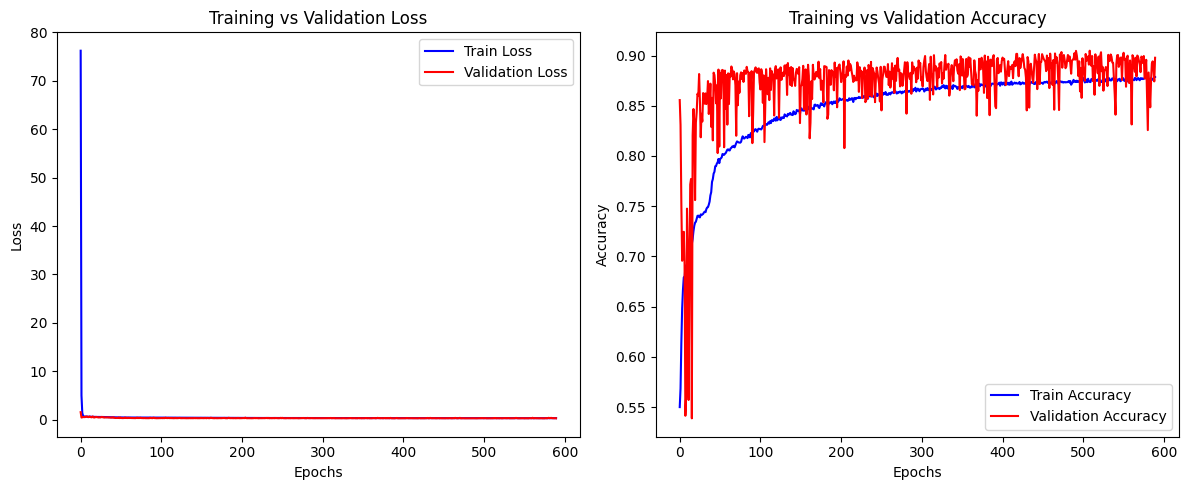

In [107]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plot Training & Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [104]:
val_auc

0.8782562826803031

In [111]:
pred = model.predict(val_X)
roc_auc_score(val_y, pred)

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 758us/step


0.8758694400294843

In [122]:
# Predict on test_X using the best model
test_predictions = model.predict(test_predict_df).flatten()

1222/1222 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step


In [ ]:
test_predictions

array([0.98784864, 0.09335676, 0.49941415, ..., 0.06305746, 0.6384107 ,
       0.93765056], dtype=float32)

In [123]:
final = pd.DataFrame({'id' : test['id'] , 'loan_status' : test_predictions})

In [124]:
final

,id,loan_status
0,58645,0.987849
1,58646,0.093357
2,58647,0.499414
3,58648,0.077457
4,58649,0.147361
...,...,...
39093,97738,0.104887
39094,97739,0.004314
39095,97740,0.063057
39096,97741,0.638411


In [125]:
final.to_csv("../data/predictions.csv", index=False)

In [17]:
def smote(X, y):
    smt = SMOTETomek(random_state=42, sampling_strategy=0.3)
    X_resampled, y_resampled = smt.fit_resample(X, y)

    return X_resampled, y_resampled

# Stacking


In [65]:
X_train, val_X, y_train, val_y = train_test_split(train_X_all, train_y_all, test_size=0.20, random_state=42)

scaler = StandardScaler()

# Fit on training data and transform both training & validation sets
X_train_scaled = scaler.fit_transform(X_train)
val_X_scaled = scaler.transform(val_X) 


#X_train_scaled, y_train = smote(X_train_scaled, y_train)

In [66]:
y_train.value_counts()

loan_status
0    40266
1     6609
Name: count, dtype: int64

In [67]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


In [71]:

# Define base models with parameter grids
base_models = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss')),
    ('knn', KNeighborsClassifier())
]

# Define meta-model (Logistic Regression)
meta_model = LogisticRegression()

# Create stacking ensemble
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Define hyperparameter grid for tuning
param_grid = {
    'rf__n_estimators': [300, 500, 700],
    'xgb__n_estimators': [100],
    'xgb__learning_rate': [0.3],
    'knn__n_neighbors': [3]
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(estimator=stacking_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train_scaled, y_train)

# Best model after tuning
best_model = grid_search.best_estimator_

# Predict using best model
y_proba = best_model.predict_proba(val_X_scaled)[:, 1]  # Probability of class 1

# Evaluate AUC
auc_score = roc_auc_score(val_y, y_proba)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC-AUC Score: {auc_score:.4f}")

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END knn__n_neighbors=3, rf__n_estimators=300, xgb__learning_rate=0.3, xgb__n_estimators=100; total time= 1.2min
[CV] END knn__n_neighbors=3, rf__n_estimators=300, xgb__learning_rate=0.3, xgb__n_estimators=100; total time= 1.2min
[CV] END knn__n_neighbors=3, rf__n_estimators=300, xgb__learning_rate=0.3, xgb__n_estimators=100; total time= 1.2min
[CV] END knn__n_neighbors=3, rf__n_estimators=300, xgb__learning_rate=0.3, xgb__n_estimators=100; total time= 1.2min
[CV] END knn__n_neighbors=3, rf__n_estimators=300, xgb__learning_rate=0.3, xgb__n_estimators=100; total time= 1.2min
[CV] END knn__n_neighbors=3, rf__n_estimators=500, xgb__learning_rate=0.3, xgb__n_estimators=100; total time= 1.8min
[CV] END knn__n_neighbors=3, rf__n_estimators=500, xgb__learning_rate=0.3, xgb__n_estimators=100; total time= 1.8min
[CV] END knn__n_neighbors=3, rf__n_estimators=500, xgb__learning_rate=0.3, xgb__n_estimators=100; total time= 1.8min
[CV]

In [51]:
best_model

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=200,
                                                       random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              gr...
                                              learning_rate=0.3, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=150, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('knn', KNeighborsClassifier(n_neighbors=3))],
                   final_estimator=LogisticRegression())

In [44]:
test_predict_df_scaled = scaler.transform(test_predict_df)

In [47]:
y_proba = best_model.predict_proba(test_predict_df_scaled)[:, 1] 

In [48]:
final = pd.DataFrame({'id' : test['id'] , 'loan_status' : y_proba})

In [49]:
final

,id,loan_status
0,58645,0.992354
1,58646,0.015076
2,58647,0.730409
3,58648,0.016200
4,58649,0.023395
...,...,...
39093,97738,0.017125
39094,97739,0.013460
39095,97740,0.013566
39096,97741,0.027872


In [50]:
final.to_csv("../data/predictions.csv", index=False)

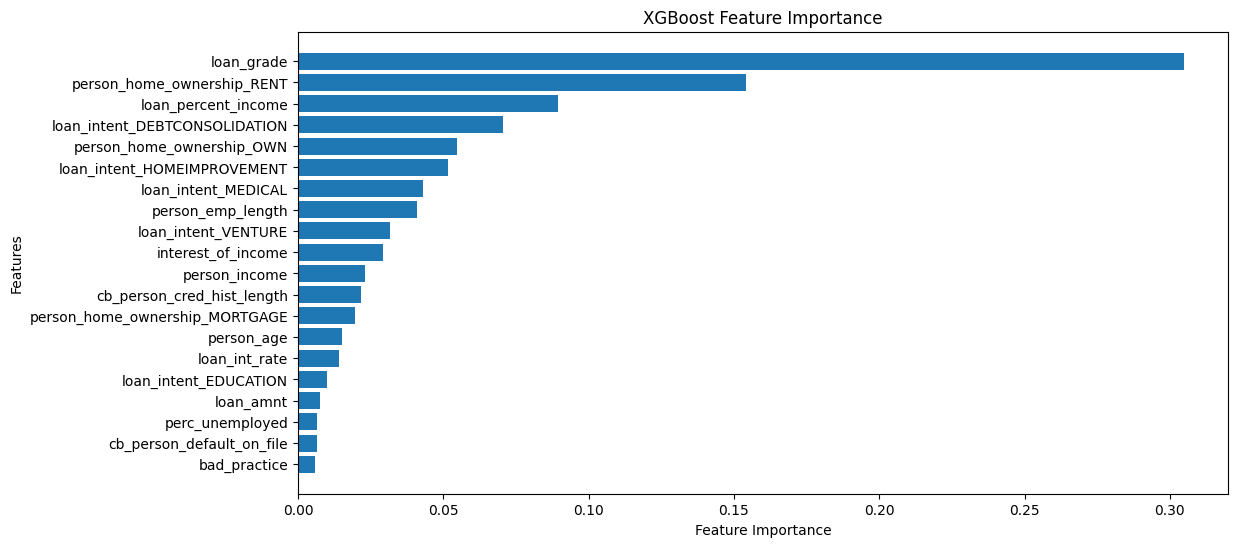

In [55]:
# Extract feature importances from the best XGBoost model
xgb_model = best_model.named_estimators_['xgb']  # Ensure 'best_model' is defined
feature_importances = xgb_model.feature_importances_

# Get feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns if hasattr(X_train, 'columns') else np.arange(len(feature_importances))

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]  # Sort in descending order

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Highest importance at top
plt.show()

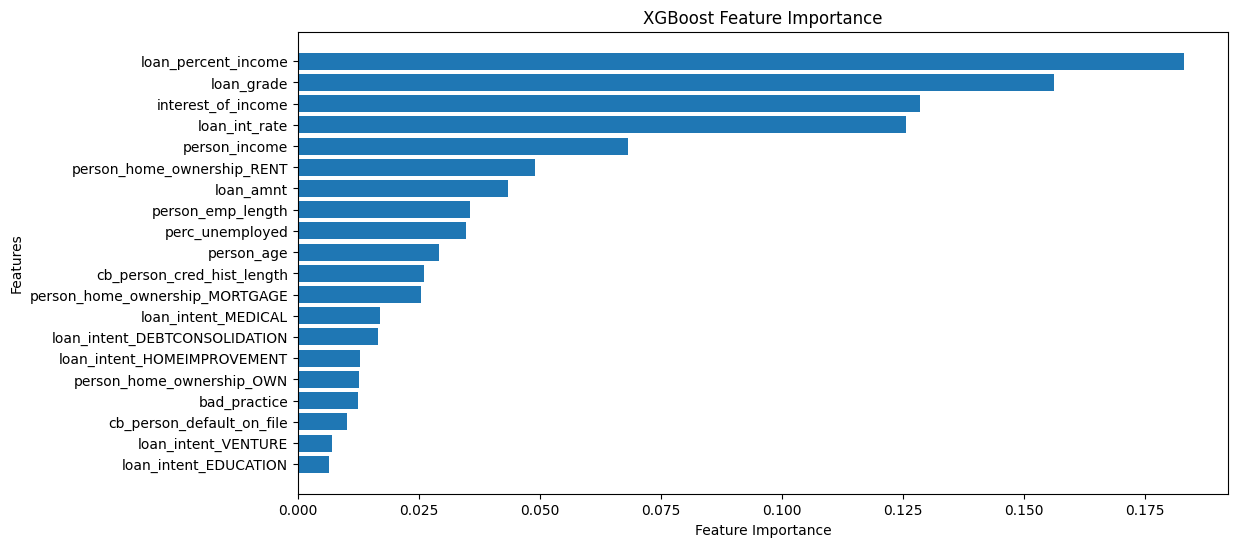

In [56]:
# Extract feature importances from the best XGBoost model
xgb_model = best_model.named_estimators_['rf']  # Ensure 'best_model' is defined
feature_importances = xgb_model.feature_importances_

# Get feature names (assuming X_train is a DataFrame)
feature_names = X_train.columns if hasattr(X_train, 'columns') else np.arange(len(feature_importances))

# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]  # Sort in descending order

# Plot feature importances
plt.figure(figsize=(12, 6))
plt.barh(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx])
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("XGBoost Feature Importance")
plt.gca().invert_yaxis()  # Highest importance at top
plt.show()


In [54]:
# Get coefficients from the meta-model
meta_model = best_model.final_estimator_

# Print coefficients and feature names
print("Meta-Model (Logistic Regression) Coefficients:")
print(meta_model.coef_)

Meta-Model (Logistic Regression) Coefficients:
[[1.85149696 4.50720753 2.88224266]]
